<a href="https://colab.research.google.com/github/Muvazana/Artificial-Intelligence---Classification-Ensemble-BanggingClassifier/blob/main/Tugas_Besar_2_Machine_Learning_(Supervised_Learning)_1301194482_1301194467.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar 2 Machine Learning (Supervised Learning)
Anggota :
- Ahmad Nur Rizal (1301194467)
- Moch. Nauval Rizaldi Nasril (1301194482)

# Import Library

In [13]:
# import general library untuk preprocessing
import pandas as pd
import time
from pandas.plotting import scatter_matrix
from collections import Counter
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# import clusification model library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# import pengecekan error library
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Explorasi Data

In [14]:
# import dataset untuk train dan validasi
dataset_train = pd.read_csv('https://raw.githubusercontent.com/Muvazana/Artificial-Intelligence---Classification-Ensemble-BanggingClassifier/main/kendaraan_train.csv')
dataset_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [15]:
# Drop useless column (id)
dataset_train.drop(columns=["id"], inplace=True)
dataset_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [16]:
# import dataset untuk test dan validasi
dataset_test = pd.read_csv('https://raw.githubusercontent.com/Muvazana/Artificial-Intelligence---Classification-Ensemble-BanggingClassifier/main/kendaraan_test.csv')
dataset_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [17]:
def cek_missing_value(df):
  sum_missing = df.isnull().sum()
  missing_value_df = pd.DataFrame({'nama_kolom': df.columns,
                                  'jumlah_missing_value': sum_missing})
  missing_value_df.sort_values('jumlah_missing_value', inplace=True)
  return missing_value_df

print(f"dataset_train is null ? {dataset_train.isnull().values.any()} ({dataset_train.isnull().values.sum()})")
cek_missing_value(dataset_train)

dataset_train is null ? True (142916)


,nama_kolom,jumlah_missing_value
Tertarik,Tertarik,0
Lama_Berlangganan,Lama_Berlangganan,13992
Kendaraan_Rusak,Kendaraan_Rusak,14188
Umur,Umur,14214
Sudah_Asuransi,Sudah_Asuransi,14229
Umur_Kendaraan,Umur_Kendaraan,14275
Kanal_Penjualan,Kanal_Penjualan,14299
Kode_Daerah,Kode_Daerah,14306
SIM,SIM,14404
Jenis_Kelamin,Jenis_Kelamin,14440


In [18]:
print(f"dataset_test is null ? {dataset_test.isnull().values.any()} ({dataset_test.isnull().values.sum()})")
cek_missing_value(dataset_test)

dataset_test is null ? False (0)


,nama_kolom,jumlah_missing_value
Jenis_Kelamin,Jenis_Kelamin,0
Umur,Umur,0
SIM,SIM,0
Kode_Daerah,Kode_Daerah,0
Sudah_Asuransi,Sudah_Asuransi,0
Umur_Kendaraan,Umur_Kendaraan,0
Kendaraan_Rusak,Kendaraan_Rusak,0
Premi,Premi,0
Kanal_Penjualan,Kanal_Penjualan,0
Lama_Berlangganan,Lama_Berlangganan,0


In [19]:
print("sum duplicate data in dataset_train =", dataset_train.duplicated().sum())
print("sum duplicate data in dataset_test =", dataset_test.duplicated().sum())

sum duplicate data in dataset_train = 169
sum duplicate data in dataset_test = 3


In [20]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [21]:
dataset_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
#Dataset Train Shape
dataset_train.shape

(285831, 11)

In [23]:
#Dataset Test Shape
dataset_test.shape

(47639, 11)

In [24]:
# Melihat perbandingan jumlah setiap kelas pada kolom tertarik (label)
dataset_train["Tertarik"].value_counts()

0    250825
1     35006
Name: Tertarik, dtype: int64

In [25]:
# Melihat perbandingan jumlah setiap kelas pada kolom tertarik (label)
dataset_test["Tertarik"].value_counts()

0    41778
1     5861
Name: Tertarik, dtype: int64

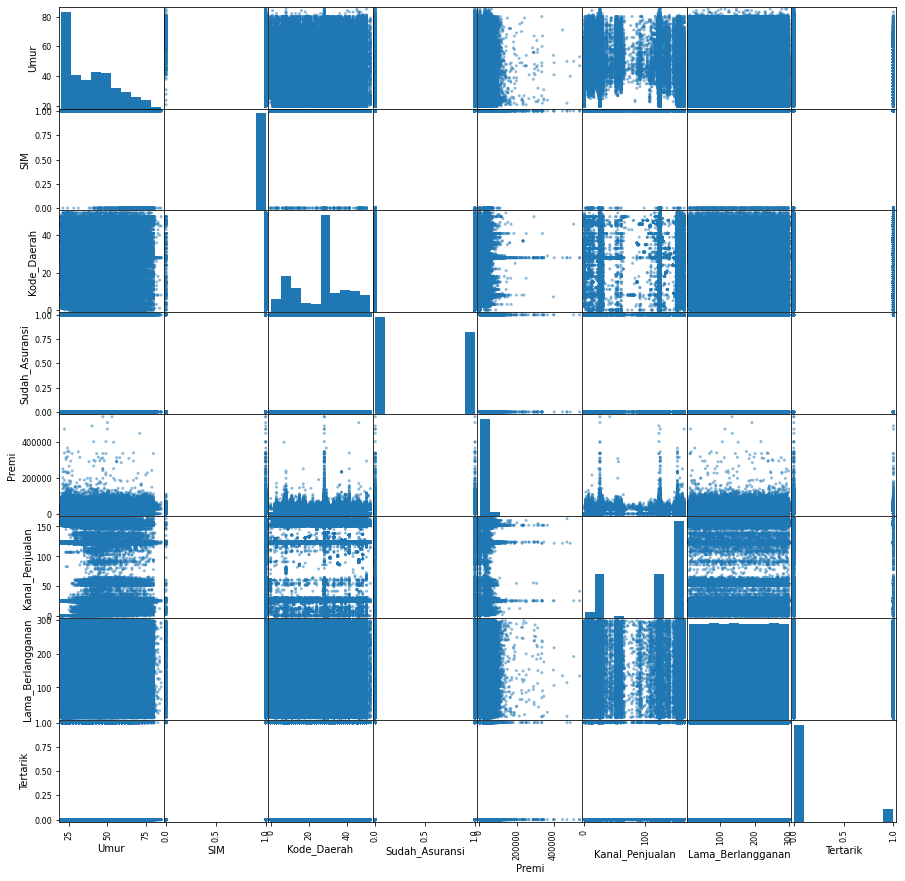

In [26]:
# Scatter matrik yang menampilkan penyebaran data antar kolom
scatter_matrix(dataset_train, alpha=0.5, figsize=(15, 15))
plt.show()

# 2. Preprocessing Data

## 2.1. Menghilangkan Duplicate Data

In [27]:
# drop Duplicate data untuk dataset_train
dataset_train.drop_duplicates(inplace=True)
print("sum duplicate data in dataset_train = ", dataset_train.duplicated().sum())

sum duplicate data in dataset_train =  0


## 2.2. Menghilangkan Missing Value

In [28]:
# Menghilangkan missing Value
# dengan aturan sebagai berikut :
#   - jika type column adalah object maka strategi untuk mengisi menggunakan modus dari column tersebut
#   - jika type column adalah bukan object maka strategi untuk mengisi menggunakan mean(nilai rata-rata) dari column tersebut
for col_name in dataset_train.columns:
  if col_name == 'Umur' or col_name == 'Premi' or col_name == 'Lama_Berlangganan':
    dataset_train[col_name].fillna(dataset_train[col_name].mean(), inplace=True)
  else:
    dataset_train[col_name].fillna(dataset_train[col_name].mode()[0], inplace=True)

print("dataset_train is null ? ",dataset_train.isnull().values.any())
dataset_train.head()

dataset_train is null ?  False


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


In [29]:
cek_missing_value(dataset_train)

,nama_kolom,jumlah_missing_value
Jenis_Kelamin,Jenis_Kelamin,0
Umur,Umur,0
SIM,SIM,0
Kode_Daerah,Kode_Daerah,0
Sudah_Asuransi,Sudah_Asuransi,0
Umur_Kendaraan,Umur_Kendaraan,0
Kendaraan_Rusak,Kendaraan_Rusak,0
Premi,Premi,0
Kanal_Penjualan,Kanal_Penjualan,0
Lama_Berlangganan,Lama_Berlangganan,0


## 2.3. Mengganti Categorical Value (String) ke Numeric

dikarenakan model pada machine learning hanya dapat menerima data bertype numeric, maka kita perlu mengganti data yang berupa string (categorical value) menjadi numeric value

In [30]:
# Merubah  Categorical (String) menjadi Numeric dengan menggunakan LabelEncoder
def cat_to_num(X):
  X['Jenis_Kelamin'] = LabelEncoder().fit_transform(X['Jenis_Kelamin'])
  X['Umur_Kendaraan'] = LabelEncoder().fit_transform(X['Umur_Kendaraan'])
  X['Kendaraan_Rusak'] = LabelEncoder().fit_transform(X['Kendaraan_Rusak'])

In [31]:
# Ubah type data sim menjadi integer
dataset_train['SIM'] = dataset_train['SIM'].astype(int)

In [32]:
# Train Data
cat_to_num(dataset_train)
dataset_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1,39.0,0.0,2,0,25800.0,29.0,158.0,0
2,0,21.0,1,46.0,1.0,1,1,32733.0,160.0,119.0,0
3,1,58.0,1,48.0,0.0,0,1,2630.0,124.0,63.0,0
4,0,50.0,1,35.0,0.0,2,0,34857.0,88.0,194.0,0


In [33]:
# Test Data
cat_to_num(dataset_test)
dataset_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


## 2.4. Identifikasi Outlier

proses mengurangi outlier dengan menggunakan methode IQR ini dilakukan untuk mengurangi bias pada model yang akan kita buat

In [34]:
def show_boxplot(x):
  red_circle = dict(markerfacecolor='blue', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(x.columns), figsize=(20,5))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(x.iloc[:,i], flierprops=red_circle)
      ax.set_title(x.columns[i], fontsize=10, fontweight='bold')
      ax.tick_params(axis='y', labelsize=8)
      
  plt.tight_layout()

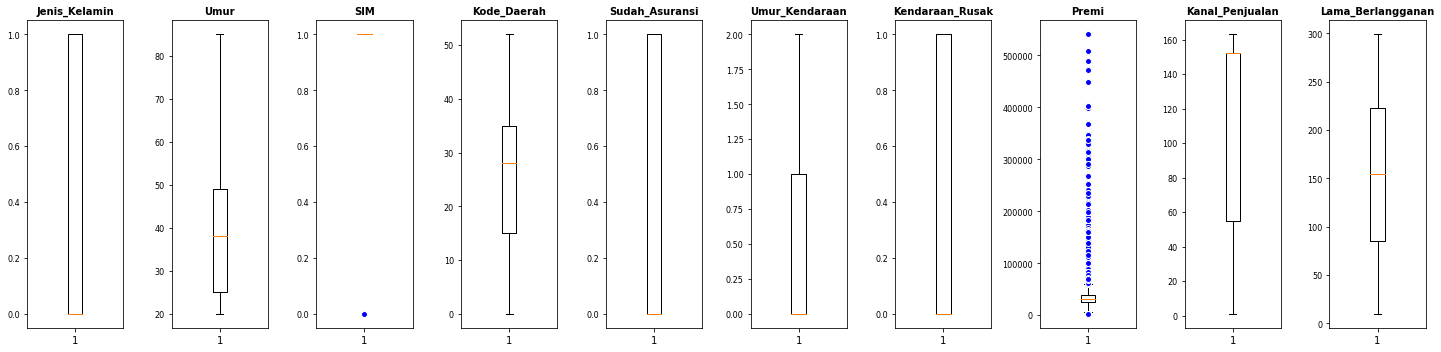

In [35]:
# Boxplot Sebelum Outlier Dihilangkan
show_boxplot(dataset_train.loc[:, dataset_train.columns[:-1]])

In [36]:
# menghilangkan outlier pada column "Premi"
def delete_outlier(x, cols):
  Q1 = x[cols].quantile(0.25)
  Q3 = x[cols].quantile(0.75)
  IQR = Q3 - Q1
  floor = Q1 - 1.5 * IQR
  ceiling = Q3 + 1.5 * IQR

  return ((x[cols] < floor) |(x[cols] > ceiling))

dataset_train = dataset_train[~delete_outlier(dataset_train, "Premi")]
dataset_train = dataset_train[~delete_outlier(dataset_train, "Premi")]
dataset_train.shape

(227014, 11)

In [37]:
# menghilangkan outlier pada column "Premi"
# def delete_outlier(X, y, col):
#   Q1 = X[col].quantile(0.25)
#   Q3 = X[col].quantile(0.75)
#   IQR = Q3 - Q1
#   floor = Q1 - 1.5 * IQR
#   ceiling = Q3 + 1.5 * IQR
  
#   outlier_idx = ((X[col] < floor) | (X[col] > ceiling))
#   return X[~outlier_idx], y[~outlier_idx]
  
# x_train_dataset, y_train_dataset = delete_outlier(x_train_dataset, y_train_dataset, "Premi")
# x_train_dataseta.shape

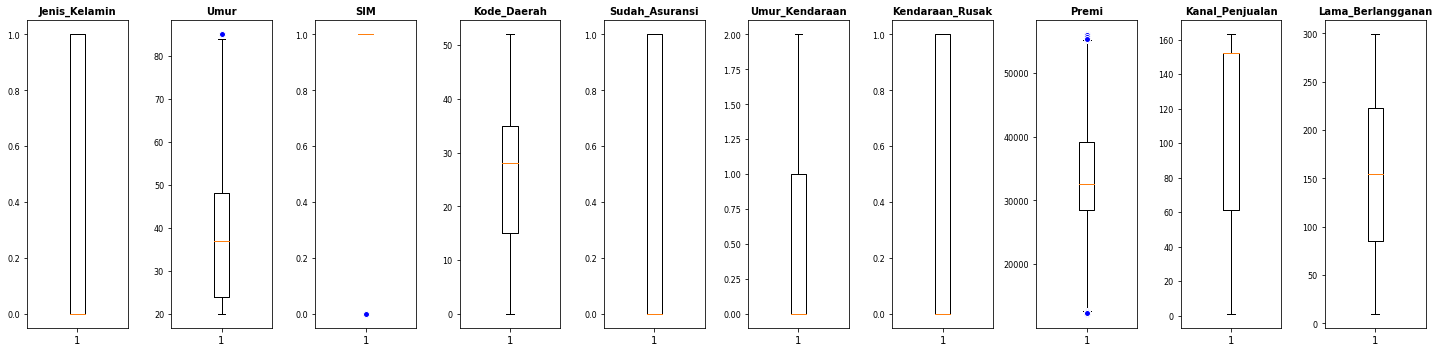

In [38]:
# Boxplot Sesudah Outlier Dihilangkan
show_boxplot(dataset_train.loc[:, dataset_train.columns[:-1]])

## 2.5. Identifikasi Korelasi antar Kolumn

dengan menggunakan heatmap dapat dilihat korelasi antar kolom pada dataset train

Text(0.5, 1.0, 'Correlation Heatmap')

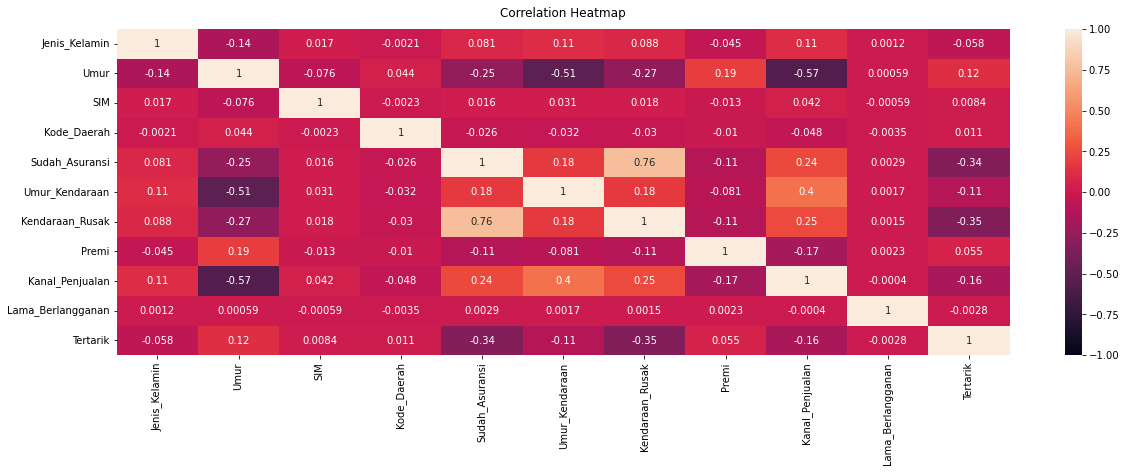

In [39]:
# menghitung correlasi antar column
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(dataset_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## 2.6. Split Label, Imbalance Data, dan Split Data Train-Validasi

### 2.6.1 Pemisahan Label dan Fitur

Dikarenakan proses Supervised Learning membutuhkan x dan y sebagai input dan output (tujuan), maka dalam kasus dataset Kendaraan y (output/tujuan) adalah fitur "Tertarik" dan x adalah selain fitur "Tertarik"

In [40]:
# pemisahan x (input) dan y (output/tujuan) 
y_train_dataset = dataset_train['Tertarik'].copy()
y_test = dataset_test['Tertarik'].copy()
x_train_dataset = dataset_train.drop(['Tertarik'], axis=1)
x_test = dataset_test.drop(['Tertarik'], axis=1)

### 2.6.2 Imbalance Data


Sebelum menggunakan Teknik Oversampling : Counter({0: 199895, 1: 27119}), dengan X Shape : (227014, 10)


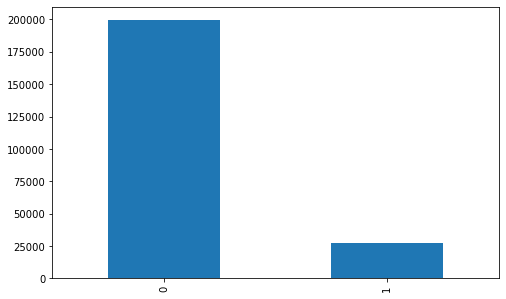

In [41]:
print(f"Sebelum menggunakan Teknik Oversampling : {Counter(y_train_dataset)}, dengan X Shape : {x_train_dataset.shape}")
temp_df = pd.DataFrame(data=y_train_dataset, columns=['Tertarik'])
plt.subplots(figsize= (8, 5))
temp_df['Tertarik'].value_counts().plot(kind='bar',)
plt.show()

Pada gambar plot diatas didapatkan bahwa perbedaan frequensi data kelas 0 (tidak tertarik) dan data kelas 1 (tertarik) pada fiture "Tertarik" yang dapat menyebabkan overfitting

Untuk menyeimbangkan frequensi data tersebut dapat menggunakan teknik oversampling dan undersampling dengan menggunakan metode Synthetic Minority Oversampling Technique (SMOTE) atau RandomUnderSampler. Pada kasus ini kami menggunakan method SMOTE dan RandomUnderSampler.

pada kasus kami, kam

Sesudah menggunakan Teknik Oversampling : Counter({0: 108476, 1: 108476}), dengan X Shape : (216952, 10)


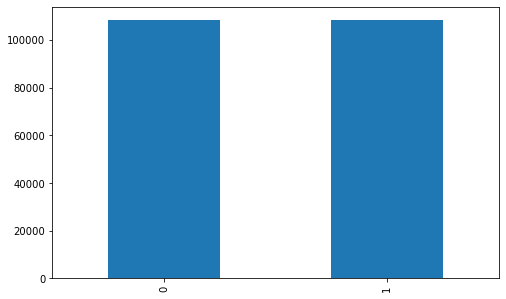

In [42]:
# UnderSampling dengan menggunakan Synthetic Minority Oversampling Technique (SMOTE)
x_train_dataset, y_train_dataset = RandomUnderSampler(sampling_strategy=0.25, random_state=42).fit_resample(x_train_dataset, y_train_dataset)
# oversampling dengan menggunakan Synthetic Minority Oversampling Technique (SMOTE)
x_train_dataset, y_train_dataset = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(x_train_dataset, y_train_dataset)

print(f"Sesudah menggunakan Teknik Oversampling : {Counter(y_train_dataset)}, dengan X Shape : {x_train_dataset.shape}")
temp_df = pd.DataFrame(data=y_train_dataset, columns=['Tertarik'])
plt.subplots(figsize= (8, 5))
temp_df['Tertarik'].value_counts().plot(kind='bar')
plt.show()

### 2.6.3 Split Data Train dan Validasi

Selanjutnya pemisahan dataset train menjadi dataset train dan dataset validasi
- dataset train digunakan untuk melatih model yang dibuat dan menseleksi parameter yang ada
- dataset validasi digunakan untuk mengevaluasi model yang telah dilatih
- dataset test digunakan untuk mengtest hasil dari model yang telah dibuat

In [43]:
# pemisahan dataset train dan dataset validasi
x_train, x_validasi, y_train, y_validasi = train_test_split(x_train_dataset, y_train_dataset, test_size=0.20, random_state=5)

## 2.7. Normalisasi

In [44]:
# normalisasi data dengan menggunakan MinMaxScaler 
def scaler_min_max(x_train, x_validasi, x_test):
  scaler = MinMaxScaler()
  return scaler.fit_transform(x_train), scaler.transform(x_validasi), scaler.transform(x_test)
  

In [ ]:
x_train_normalized, x_validasi_normalized, x_test_normalized = scaler_min_max(x_train, x_validasi, x_test)

In [46]:
X_train_array = np.asarray(x_train_normalized)
y_train_array = np.asarray(y_train)
X_validasi_array = np.asarray(x_validasi_normalized)
y_validasi_array = np.asarray(y_validasi)
X_test_array = np.asarray(x_test_normalized)
y_test_array = np.asarray(y_test)

# 3. Train Model

tahap proses train model ini dilakukan dengan sebagai berikut:
- pertama adalah proses pemilihan parameter terbaik dan menggunakan cross validation
- setelah memilih parameter terbaik di lakukan proses train pada decision tree tanpa menggunakan ensemble dan dengan menggunakan ensemble 
- terakhir dilakukan proses evaluasi dari model kita dan didapatkan model terbaik yang selanjutnya akan digunakan untuk proses test

## 3.1. Memilih Parameter Terbaik

pemilihan dilakukan dengan mencoba satu persatu parameter yang telah diset dengan model, setelah itu melakukan cross validation untuk meminimkan error untuk split data yang berbeda-beda

In [47]:
def search_best_params(X_train, y_train):
  # kumpulan parameter yang akan di pilah
  param_grid = { 
      'max_leaf_nodes': [500, 2000, 4000, None], # digunakan pada DecisionTreeClassifier
      'n_estimators': [40, 60, 80, 100, 150, 200] # digunakan pada BaggingClassifier
  }
  # Proses Pemilahan
  performa_bc_dtc = []
  for i in param_grid['max_leaf_nodes']:
    start = time.time()
    temp_dtc = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=i)
    for j in param_grid['n_estimators']:
      temp_bc = BaggingClassifier(base_estimator=temp_dtc, max_samples=0.5, max_features = 1.0, n_estimators=j, n_jobs=-1)
      mean_cross_val_result = np.mean(cross_val_score(temp_bc, X_train, y_train, cv=5)) # cross validation 
      performa_bc_dtc.append([(999999 if i == None else i), j, mean_cross_val_result])
      print(f"max_leaf_nodes : {i}, n_estimators : {j}, mean_cross_score : {mean_cross_val_result}, time : {int(time.time()-start)} detik")

  return pd.DataFrame(performa_bc_dtc, columns=['max_leaf_nodes', 'n_estimators', 'mean_cross_score'])

performa_bc_dtc = search_best_params(x_train_dataset, y_train_dataset)

max_leaf_nodes : 500, n_estimators : 40, mean_cross_score : 0.8206526174316713, time : 30 detik
max_leaf_nodes : 500, n_estimators : 60, mean_cross_score : 0.818974850577656, time : 75 detik
max_leaf_nodes : 500, n_estimators : 80, mean_cross_score : 0.821224167182401, time : 132 detik
max_leaf_nodes : 500, n_estimators : 100, mean_cross_score : 0.8204359892318172, time : 204 detik
max_leaf_nodes : 500, n_estimators : 150, mean_cross_score : 0.8206480080746765, time : 306 detik
max_leaf_nodes : 500, n_estimators : 200, mean_cross_score : 0.8206065351219358, time : 449 detik
max_leaf_nodes : 2000, n_estimators : 40, mean_cross_score : 0.8267876798774318, time : 32 detik
max_leaf_nodes : 2000, n_estimators : 60, mean_cross_score : 0.8275666589787395, time : 81 detik
max_leaf_nodes : 2000, n_estimators : 80, mean_cross_score : 0.8272071342321166, time : 147 detik
max_leaf_nodes : 2000, n_estimators : 100, mean_cross_score : 0.8272854908577731, time : 220 detik
max_leaf_nodes : 2000, n_est

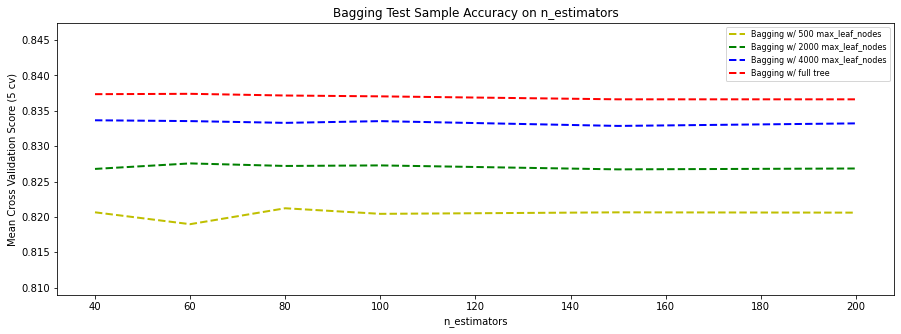

Best Parameters for model is {'max_leaf_nodes': None, 'n_estimators': 60}


In [48]:
# Plot perbandingan antar paremeter
def plot_antar_param(performa):
  plt.figure(figsize=(15,5))
  plt.plot(performa.loc[(performa.max_leaf_nodes==500), ['n_estimators']], performa.loc[(performa.max_leaf_nodes==500), ['mean_cross_score']],linestyle='--',linewidth=2,color='y', label='Bagging w/ 500 max_leaf_nodes')
  plt.plot(performa.loc[(performa.max_leaf_nodes==2000), ['n_estimators']], performa.loc[(performa.max_leaf_nodes==2000), ['mean_cross_score']],linestyle='--',linewidth=2,color='g', label='Bagging w/ 2000 max_leaf_nodes')
  plt.plot(performa.loc[(performa.max_leaf_nodes==4000), ['n_estimators']], performa.loc[(performa.max_leaf_nodes==4000), ['mean_cross_score']],linestyle='--',linewidth=2,color='b', label='Bagging w/ 4000 max_leaf_nodes')
  plt.plot(performa.loc[(performa.max_leaf_nodes==999999), ['n_estimators']], performa.loc[(performa.max_leaf_nodes==999999), ['mean_cross_score']],linestyle='--',linewidth=2,color='r', label='Bagging w/ full tree')
  plt.legend(fontsize=8)
  plt.title('Bagging Test Sample Accuracy on n_estimators')
  plt.ylim([performa['mean_cross_score'].values.min()-0.01, performa['mean_cross_score'].values.max()+0.01])
  plt.ylabel('Mean Cross Validation Score (5 cv)')
  plt.xlabel('n_estimators')
  plt.show()

  best_bc_dtc_parameter = { 
      'max_leaf_nodes': (None if performa['max_leaf_nodes'][performa['mean_cross_score'].idxmax()] == 999999 else performa['max_leaf_nodes'][performa['mean_cross_score'].idxmax()]),
      'n_estimators': performa['n_estimators'][performa['mean_cross_score'].idxmax()]
  }
  print(f"Best Parameters for model is {best_bc_dtc_parameter}")
  return best_bc_dtc_parameter

best_bc_dtc_parameter = plot_antar_param(performa_bc_dtc)

## 3.2. Latih Model

implementasi hasil dari proses pemilihan parameter terbaik untuk model kita

In [84]:
dtc_model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=(None if best_bc_dtc_parameter['max_leaf_nodes'] == 999999 else best_bc_dtc_parameter['max_leaf_nodes']))
dtc_model.fit(X_train_array, y_train_array)

DecisionTreeClassifier(criterion='entropy')

In [85]:
bc_model = BaggingClassifier(base_estimator=dtc_model, max_samples=0.5, max_features = 1.0, n_estimators=best_bc_dtc_parameter['n_estimators'], n_jobs=-1)
bc_model.fit(X_train_array, y_train_array)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.5, n_estimators=60, n_jobs=-1)

## 3.3. Evaluasi Model

Berikut adalah beberapa tahapan Evaluasi model dengan dataset **validasi**:
- Model dievaluasi dengan data validasi yang menghasilkan **Akurasi** dan **Mean Squared Error (MSE)** terhadap setiap model yang dibuat
- Selanjutnya visualisasi data dengan `ConfusionMatrixDisplay` 
- Selanjutnya visualisasi dari **Akurasi** dan **Mean Squared Error (MSE)** 
- Terakhir adalah proses penentuan model terbaik beserta hasil **Akurasi**, **Mean Squared Error (MSE)** dan **Classification Report**

In [86]:
def get_result(model, X, y):
  print("Classifier Name \t:", model.__class__.__name__)
  y_predict = model.predict(X)
  akurasi = accuracy_score(y, y_predict)
  mse = mean_squared_error(y, y_predict)
  print("Akurasi \t\t:", akurasi)
  print(f"Mean Squared Error (MSE): {mse}\n")
  return [model, model.__class__.__name__, mse, akurasi, y_predict]

In [87]:
cols = ['model', 'Classifiers', 'Mean Squared Error (MSE)', 'Akurasi', 'y_predict']
results = []
results.append(get_result(dtc_model, X_validasi_array, y_validasi_array))
results.append(get_result(bc_model, X_validasi_array, y_validasi_array))
results = pd.DataFrame(data=results, columns=cols)

Classifier Name 	: DecisionTreeClassifier
Akurasi 		: 0.8498767025420018
Mean Squared Error (MSE): 0.1501232974579982

Classifier Name 	: BaggingClassifier
Akurasi 		: 0.8701113134060059
Mean Squared Error (MSE): 0.12988868659399413



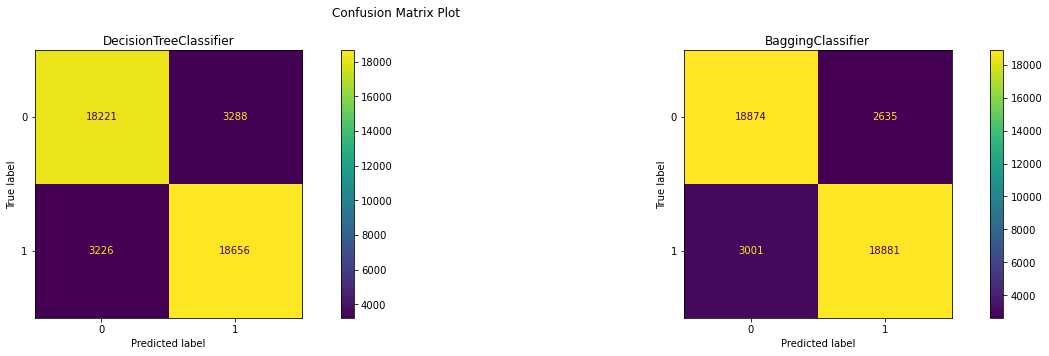

In [88]:
# visualisasi ConfusionMatrix
# untuk mengetahui seberapa tepat model kita memprediksi validasi data yang diberikan
def multiplot_confustionmatrix(y_val, results_):
  fig, axs = plt.subplots(1, len(results_), figsize= (20, 5))
  fig.suptitle('Confusion Matrix Plot')
  for i, result in results_.iterrows():
    ConfusionMatrixDisplay.from_predictions(y_val, result['y_predict'], ax=axs[i])
    axs[i].set_title(result['Classifiers'])

  plt.tight_layout()
  plt.show()

multiplot_confustionmatrix(y_validasi_array, results)

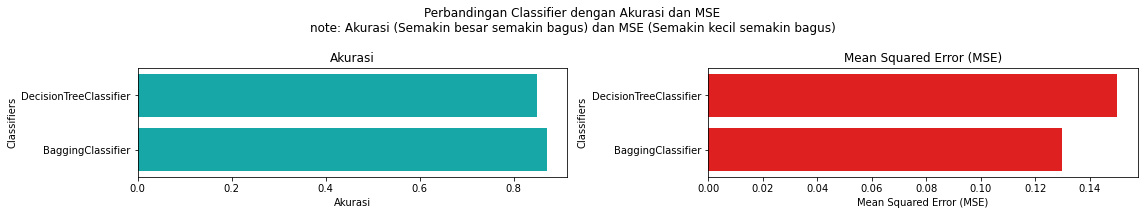


Model Klasifikasi yang terbaik dari 2 model yang dibuat adalah BaggingClassifier dengan 
Akurasi 		: 0.8701113134060059
Mean Squared Error (MSE): 0.12988868659399413

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     21509
           1       0.88      0.86      0.87     21882

    accuracy                           0.87     43391
   macro avg       0.87      0.87      0.87     43391
weighted avg       0.87      0.87      0.87     43391



In [89]:
# Visualisasi hasil MSE dan Akuransi
def visualisasi_mse_akurasi(y_val, results_):
  fig, axs = plt.subplots(1, 2, figsize=(16, 3))
  fig.suptitle('Perbandingan Classifier dengan Akurasi dan MSE\nnote: Akurasi (Semakin besar semakin bagus) dan MSE (Semakin kecil semakin bagus)')

  sns.barplot(x=cols[3], y=cols[1], data=results_, color="c", ax=axs[0])
  plt.xlabel(cols[2])
  axs[0].set_title(cols[3])

  sns.barplot(x=cols[2], y=cols[1], data=results_, color="r", ax=axs[1])
  plt.xlabel(cols[2])
  axs[1].set_title(cols[2])

  plt.tight_layout()
  plt.show()

  # menentukan Best
  best_model_idx = results_['Akurasi'].idxmax()
  print(f"\nModel Klasifikasi yang terbaik dari {len(results_)} model yang dibuat adalah {results_.iloc[best_model_idx, 1]} dengan ")

  print("Akurasi \t\t:", results_.iloc[best_model_idx, 3])
  print(f"Mean Squared Error (MSE): {results_.iloc[best_model_idx, 2]}\n")
  print(classification_report(y_val.to_numpy().ravel(), results_.iloc[best_model_idx, 4], labels=dataset_train['Tertarik'].unique()))

  return results_.iloc[best_model_idx, 0]

best_model = visualisasi_mse_akurasi(y_validasi, results)

# 4. Test Model

uji coba model terbaik dengan dataset test yang diberikan

In [103]:
# akurasi, MSE dan report
y_test_predict = best_model.predict(X_test_array)
akurasi = accuracy_score(y_test_array, y_test_predict)
mse = mean_squared_error(y_test_array, y_test_predict)
print("Classifier Name \t:", best_model.__class__.__name__)
print("Akurasi \t\t:", akurasi)
print(f"Mean Squared Error (MSE): {mse}\n")
print(classification_report(y_test.to_numpy().ravel(), y_test_predict, labels=dataset_test['Tertarik'].unique()))

Classifier Name 	: BaggingClassifier
Akurasi 		: 0.8162429941854363
Mean Squared Error (MSE): 0.1837570058145637

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     41778
           1       0.32      0.46      0.38      5861

    accuracy                           0.82     47639
   macro avg       0.62      0.66      0.64     47639
weighted avg       0.85      0.82      0.83     47639



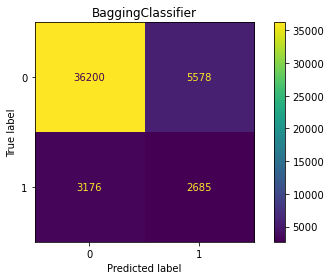

In [104]:
# visualisasi ConfusionMatrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_predict)
plt.title('BaggingClassifier')

plt.tight_layout()
plt.show()

# 5. Experimen

proses eksperimen yang dilakukan terdapat pada perubahan teknik balancing data yang awalnya menggunakan undersampling sebanyak 25% dan oversampling dirubah menjadi hanya memakai oversampling. Berikut adalah hasil programnya : 

## 5.1 Preprossing

### 5.1.1 Split fitur dan Label

In [61]:
# pemisahan x (input) dan y (output/tujuan) 
y_train_dataset_exper = dataset_train['Tertarik'].copy()
x_train_dataset_exper = dataset_train.drop(['Tertarik'], axis=1)

### 5.1.2. Imbalance Data 

Sebelum menggunakan Teknik Oversampling : Counter({0: 199895, 1: 27119}), dengan X Shape : (227014, 10)


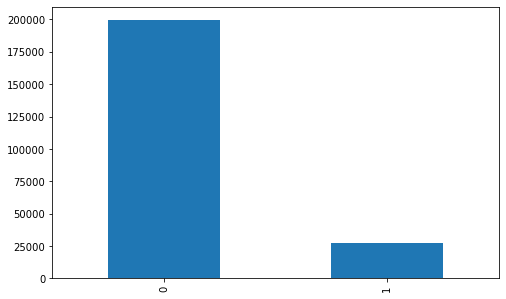

In [62]:
print(f"Sebelum menggunakan Teknik Oversampling : {Counter(y_train_dataset_exper)}, dengan X Shape : {x_train_dataset_exper.shape}")
temp_df_exper = pd.DataFrame(data=y_train_dataset_exper, columns=['Tertarik'])
plt.subplots(figsize= (8, 5))
temp_df_exper['Tertarik'].value_counts().plot(kind='bar',)
plt.show()

Sesudah menggunakan Teknik Oversampling : Counter({0: 199895, 1: 199895}), dengan X Shape : (399790, 10)


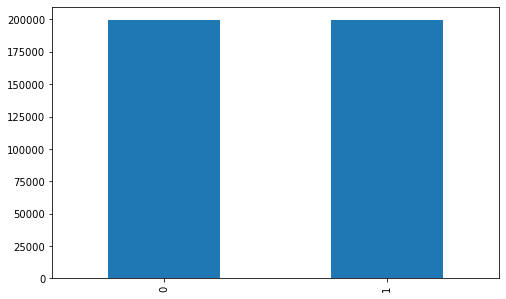

In [63]:
# oversampling dengan menggunakan Synthetic Minority Oversampling Technique (SMOTE)
x_train_dataset_exper, y_train_dataset_exper = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(x_train_dataset_exper, y_train_dataset_exper)

print(f"Sesudah menggunakan Teknik Oversampling : {Counter(y_train_dataset_exper)}, dengan X Shape : {x_train_dataset_exper.shape}")
temp_df_exper = pd.DataFrame(data=y_train_dataset_exper, columns=['Tertarik'])
plt.subplots(figsize= (8, 5))
temp_df_exper['Tertarik'].value_counts().plot(kind='bar')
plt.show()

### 5.1.3. Split data train dan data validasi

In [64]:
# pemisahan dataset train dan dataset validasi
x_train_exper, x_validasi_exper, y_train_exper, y_validasi_exper = train_test_split(x_train_dataset_exper, y_train_dataset_exper, test_size=0.20, random_state=5)

### 5.1.4. Normalisasi

In [65]:
x_train_normalized_exper, x_validasi_normalized_exper, _ = scaler_min_max(x_train_exper, x_validasi_exper, x_test)

In [66]:
X_train_array_exper = np.asarray(x_train_normalized_exper)
y_train_array_exper = np.asarray(y_train_exper)
X_validasi_array_exper = np.asarray(x_validasi_normalized_exper)
y_validasi_array_exper = np.asarray(y_validasi_exper)

## 5.2. Train Model

### 5.2.1. Memilih Parameter Terbaik

In [67]:
performa_bc_dtc_exper = search_best_params(x_train_dataset_exper, y_train_dataset_exper)

max_leaf_nodes : 500, n_estimators : 40, mean_cross_score : 0.8965581930513519, time : 70 detik
max_leaf_nodes : 500, n_estimators : 60, mean_cross_score : 0.8956902373746217, time : 159 detik
max_leaf_nodes : 500, n_estimators : 80, mean_cross_score : 0.8957652767703044, time : 258 detik
max_leaf_nodes : 500, n_estimators : 100, mean_cross_score : 0.8958203056604719, time : 379 detik
max_leaf_nodes : 500, n_estimators : 150, mean_cross_score : 0.8953300482753445, time : 557 detik
max_leaf_nodes : 500, n_estimators : 200, mean_cross_score : 0.8956627229295379, time : 796 detik
max_leaf_nodes : 2000, n_estimators : 40, mean_cross_score : 0.9044348282848496, time : 53 detik
max_leaf_nodes : 2000, n_estimators : 60, mean_cross_score : 0.9050451487030692, time : 131 detik
max_leaf_nodes : 2000, n_estimators : 80, mean_cross_score : 0.9053528102253683, time : 237 detik
max_leaf_nodes : 2000, n_estimators : 100, mean_cross_score : 0.9051752169889193, time : 367 detik
max_leaf_nodes : 2000, n

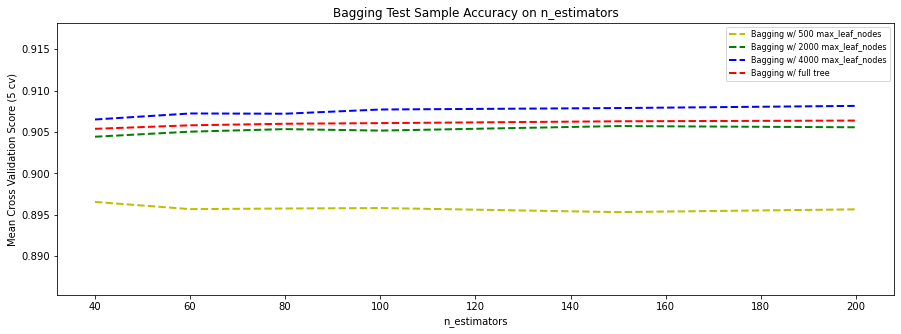

Best Parameters for model is {'max_leaf_nodes': 4000, 'n_estimators': 200}


In [92]:
best_bc_dtc_parameter_exper = plot_antar_param(performa_bc_dtc_exper)

### 5.2.2. Latih Model

In [95]:
dtc_model_exper = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=(None if best_bc_dtc_parameter_exper['max_leaf_nodes'] == 999999 else best_bc_dtc_parameter_exper['max_leaf_nodes']))
dtc_model_exper.fit(X_train_array_exper, y_train_array_exper)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4000)

In [96]:
bc_model_exper = BaggingClassifier(base_estimator=dtc_model, max_samples=0.5, max_features = 1.0, n_estimators=best_bc_dtc_parameter_exper['n_estimators'], n_jobs=-1)
bc_model_exper.fit(X_train_array_exper, y_train_array_exper)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.5, n_estimators=200, n_jobs=-1)

### 5.2.3. Evaluasi Model

In [97]:
results_exper = []
results_exper.append(get_result(dtc_model_exper, X_validasi_array_exper, y_validasi_array_exper))
results_exper.append(get_result(bc_model_exper, X_validasi_array_exper, y_validasi_array_exper))
results_exper = pd.DataFrame(data=results_exper, columns=cols)

Classifier Name 	: DecisionTreeClassifier
Akurasi 		: 0.908727081717902
Mean Squared Error (MSE): 0.0912729182820981

Classifier Name 	: BaggingClassifier
Akurasi 		: 0.9200580304659947
Mean Squared Error (MSE): 0.07994196953400536



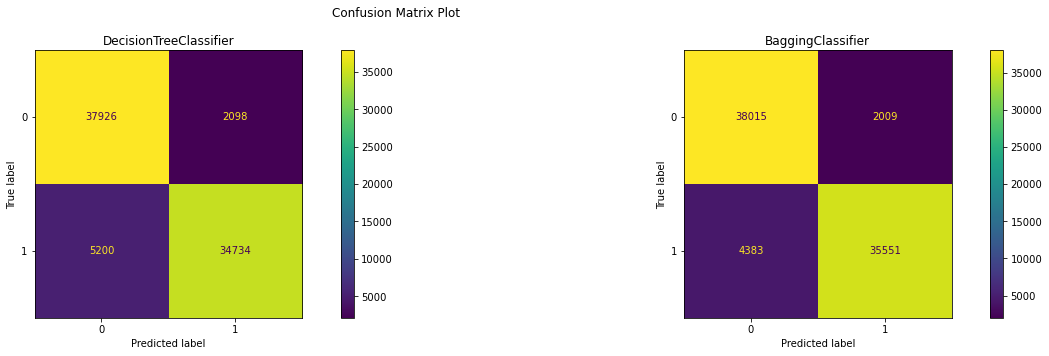

In [98]:
multiplot_confustionmatrix(y_validasi_array_exper, results_exper)

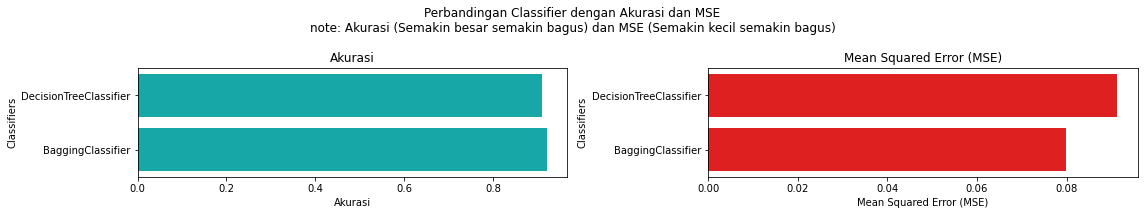


Model Klasifikasi yang terbaik dari 2 model yang dibuat adalah BaggingClassifier dengan 
Akurasi 		: 0.9200580304659947
Mean Squared Error (MSE): 0.07994196953400536

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     40024
           1       0.95      0.89      0.92     39934

    accuracy                           0.92     79958
   macro avg       0.92      0.92      0.92     79958
weighted avg       0.92      0.92      0.92     79958



In [99]:
best_model_exper = visualisasi_mse_akurasi(y_validasi_exper, results_exper)

## 5.3. Test Model

In [100]:
# akurasi, MSE dan report
y_test_predict_exper = best_model_exper.predict(X_test_array)
akurasi = accuracy_score(y_test_array, y_test_predict_exper)
mse = mean_squared_error(y_test_array, y_test_predict_exper)
print("Classifier Name \t:", best_model_exper.__class__.__name__)
print("Akurasi \t\t:", akurasi)
print(f"Mean Squared Error (MSE): {mse}\n")
print(classification_report(y_test.to_numpy().ravel(), y_test_predict_exper, labels=dataset_test['Tertarik'].unique()))

Classifier Name 	: BaggingClassifier
Akurasi 		: 0.8533554440689352
Mean Squared Error (MSE): 0.14664455593106487

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     41778
           1       0.34      0.21      0.26      5861

    accuracy                           0.85     47639
   macro avg       0.62      0.58      0.59     47639
weighted avg       0.83      0.85      0.84     47639



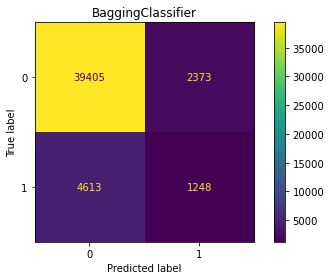

In [101]:
# visualisasi ConfusionMatrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_predict_exper)
plt.title('BaggingClassifier')

plt.tight_layout()
plt.show()